# 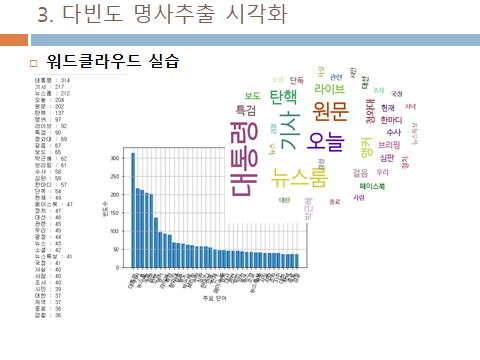

In [ ]:
import json
import re #정규표현식(regular expression)

from konlpy.tag import Okt
from collections import Counter

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc

import pytagcloud
import webbrowser

In [ ]:
#[CODE 1]
def showGraph(wordInfo):
    font_location = "c:/Windows/fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=font_location).get_name()
    matplotlib.rc('font', family=font_name)

    plt.xlabel('주요 단어')
    plt.ylabel('빈도수')
    plt.grid(True)
    
    Sorted_Dict_Values = sorted(wordInfo.values(), reverse=True)
    Sorted_Dict_Keys = sorted(wordInfo, key=wordInfo.get, reverse=True)

    plt.bar(range(len(wordInfo)), Sorted_Dict_Values, align='center')
    plt.xticks(range(len(wordInfo)), list(Sorted_Dict_Keys), rotation='70')

    plt.show()

In [ ]:
#[CODE 2]

def saveWordCloud(wordInfo, filename):
    
    taglist = pytagcloud.make_tags(dict(wordInfo).items(), maxsize=80)
    pytagcloud.create_tag_image(taglist, filename, size=(640, 480), fontname='Korean', rectangular=False)
    webbrowser.open(filename) 

In [ ]:
def main():
    #여기서 파일의 경로는 실제 JSON 데이터가 저장된 경로이다

    openFileName = 'data/jtbcnews_facebook_2016-10-01_2017-03-12.json'

    cloudImagePath = openFileName + '.jpg'
    
    rfile = open(openFileName, 'r', encoding='utf-8').read()
    
    jsonData = json.loads(rfile)
    message = ''
    
    for item in jsonData:
        if 'message' in item.keys():
            message = message + re.sub(r'[^\w]', ' ', item['message']) + ' '
    
    nlp = Okt()
    nouns = nlp.nouns(message)
    count = Counter(nouns)
    
    wordInfo = dict()
    
    for tags, counts in count.most_common(50):
        if (len(str(tags)) > 1):
            wordInfo[tags] = counts
            print ("%s : %d" % (tags, counts))
            
    showGraph(wordInfo)
    saveWordCloud(wordInfo, cloudImagePath)

In [ ]:
main()